In [1]:
#load the dependans
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
car_data = pd.read_csv('quikr_car.csv')
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car_data['kms_driven']

0      45,000 kms
1          40 kms
2      22,000 kms
3      28,000 kms
4      36,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 892, dtype: object

In [4]:
#shape of the dataset
car_data.shape

(892, 6)

In [5]:
car_data['fuel_type']

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
887       NaN
888    Diesel
889    Diesel
890       NaN
891       NaN
Name: fuel_type, Length: 892, dtype: object

In [6]:
car_data['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

In [7]:
#info about the car
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


the datas are in object, we want change it into numaric

In [8]:
#cheaking for a null value
car_data.isnull().sum()


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
car_copy = car_data.copy()

# data cleaning

In [10]:
#data type
car_data['year'].dtype

dtype('O')

In [11]:
#change the values to numaric
car_data =car_data[car_data['year'].str.isnumeric()]

In [12]:
# change the year to numaric
car_data['year'] = car_data['year'].astype(int)

In [13]:
car_data['year'].dtype

dtype('int32')

In [14]:
# car price has ask for price
car_data= car_data[car_data['Price'] != 'Ask For Price']


In [15]:
# price have commas,price it in object
car_data['Price'] = car_data['Price'].str.replace(',','')

In [16]:
car_data['Price'] = car_data['Price'].astype(int)

In [17]:
car_data['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [18]:
#kms_ driven has object values becasue of the kms in the end of data
car_data['kms_driven'] = car_data['kms_driven'].str.split().str.get(0).str.replace(',','')

In [19]:
car_data['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
886    Petrol
888    Diesel
889    Diesel
890       NaN
891       NaN
Name: fuel_type, Length: 819, dtype: object

In [20]:

car_data=car_data[car_data['kms_driven'].str.isnumeric()] 

In [21]:
car_data['kms_driven'] = car_data['kms_driven'].astype(int)

In [22]:
#fuel type has nan values
car_data = car_data[~car_data['fuel_type'].isna()]

In [23]:
car_data.shape

(816, 6)

In [24]:
# iam want first 3 words of company
car_data['name'] = car_data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [25]:
car_data= car_data.reset_index(drop=True)

In [26]:
#cleaned data
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [27]:
car_data.to_csv('car_data_cleaned.csv')

In [28]:
#import the cleaned data
car=pd.read_csv('car_data_cleaned.csv')
car

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [29]:
#car data describe
car.describe()

,Unnamed: 0,year,Price,kms_driven
count,816.000000,816.000000,8.160000e+02,816.000000
mean,407.500000,2012.444853,4.117176e+05,46275.531863
std,235.703203,4.002992,4.751844e+05,34297.428044
min,0.000000,1995.000000,3.000000e+04,0.000000
25%,203.750000,2010.000000,1.750000e+05,27000.000000
50%,407.500000,2013.000000,2.999990e+05,41000.000000
75%,611.250000,2015.000000,4.912500e+05,56818.500000
max,815.000000,2019.000000,8.500003e+06,400000.000000


In [30]:
car = car[car['Price'] < 6000000]
car

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [31]:
#unique values in every colums
#['name','company','year','kms_driven','fuel_type']
for column in car.columns:
    num_distinct_values = len(car[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 815 distinct values
name: 254 distinct values
company: 25 distinct values
year: 21 distinct values
Price: 271 distinct values
kms_driven: 246 distinct values
fuel_type: 3 distinct values


Text(0.5, 1.0, 'fuel type')

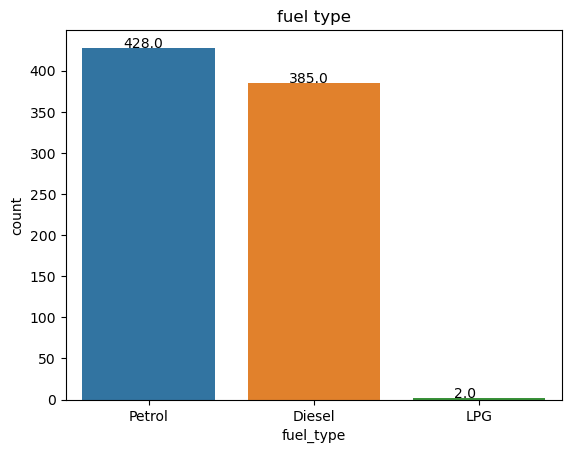

In [57]:
#univariate analysis
ax=sns.countplot(x=car['fuel_type'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.title('fuel type')    

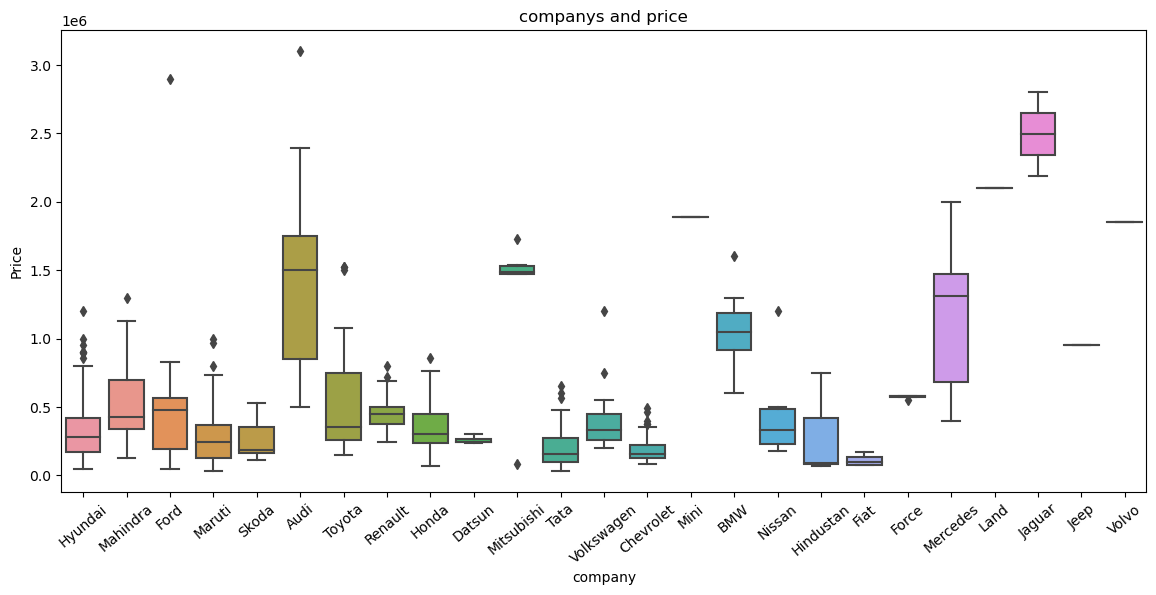

In [58]:
plt.subplots(figsize=(14,6))
ax = sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title('companys and price')
plt.show()

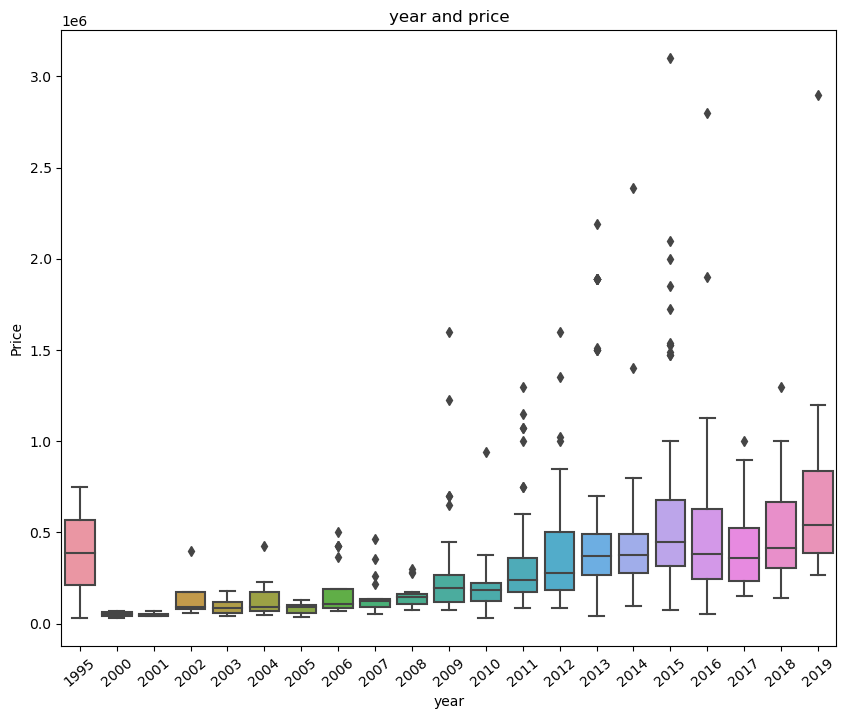

In [59]:
plt.subplots(figsize=(10,8))
ax = sns.boxplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title('year and price')
plt.show()

Text(0.5, 1.0, 'kms_driven vs Price')

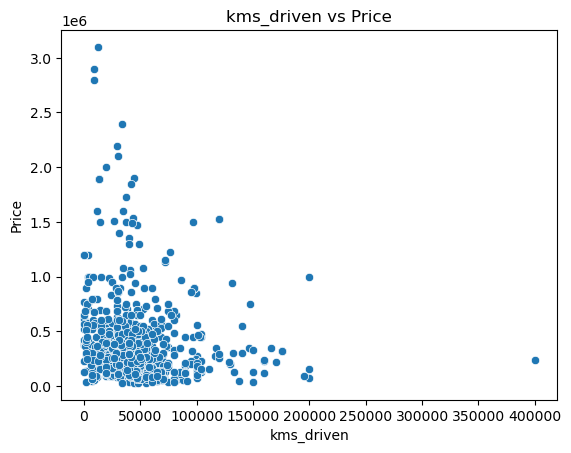

In [60]:
sns.scatterplot(x='kms_driven',y= 'Price',data=car)
plt.title('kms_driven vs Price')

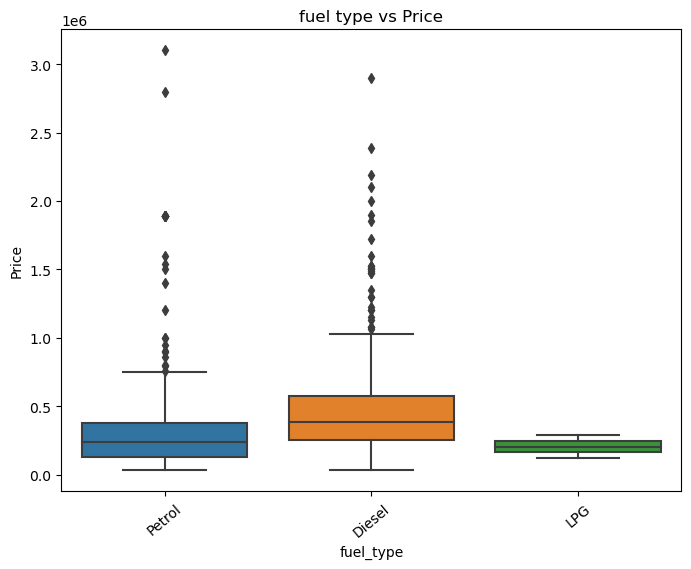

In [61]:
plt.subplots(figsize=(8,6))
ax = sns.boxplot(x='fuel_type',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title('fuel type vs Price')
plt.show()


Text(0.5, 1.0, 'company and  Price based on Year')

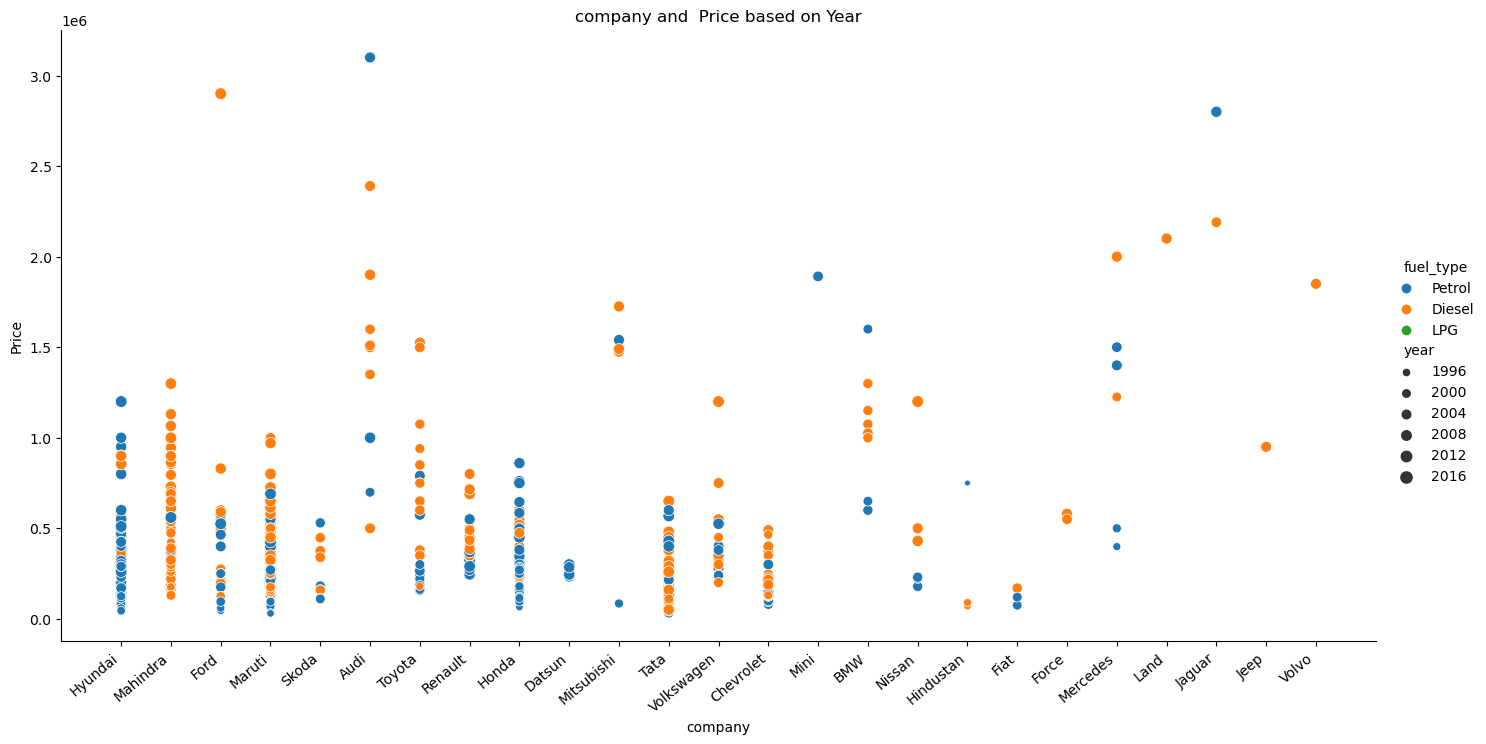

In [62]:
#fual year and company
ax = sns.relplot(x='company', y='Price',data=car, hue='fuel_type',size = 'year', height=7, aspect=2)
ax.set_xticklabels(rotation=40, ha='right')
plt.title('company and  Price based on Year')

In [38]:
#extracting train test
X = car[['name','company','year','kms_driven','fuel_type']]
y = car[['Price']]


In [39]:
print(X.shape,
      y.shape)


(815, 5) (815, 1)


In [40]:
# train test split for the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)


In [41]:
#model building
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [42]:
# one hot encoding for categorical variables
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])


OneHotEncoder()

In [43]:
#transformaer to transform columns
col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [44]:
#linerregression model
lr_model = LinearRegression()

In [45]:
#making a pipeline 
pipe = make_pipeline(col_trans,lr_model)

In [46]:
#fit the model in pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [47]:
#predicting x_test data
y_pred = pipe.predict(X_test)


In [48]:
#cheaking the r2 score
r2_score(y_test,y_pred)

0.573130456899225

In [49]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=i)
    lr_model = LinearRegression()
    pipe = make_pipeline(col_trans,lr_model)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [50]:
np.argmax(scores)

302

In [51]:
scores[np.argmax(scores)]

0.8959285359819742

In [52]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([[430345.10228051]])

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=np.argmax(scores))
lr_model = LinearRegression()
pipe = make_pipeline(col_trans,lr_model)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8959285359819742

In [54]:
import pickle

pickle.dump(pipe,open('LinearRegressionModel.pkl', 'wb'))


In [55]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift', 'Maruti',2019,100,'Petrol']).reshape(1,5)))

array([[507857.7381856]])

In [56]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese